In [43]:
import torch
from training.FiretraceMLP import FiretraceMLP

checkpoint = torch.load("../models/firetrace_model.pt")

model = FiretraceMLP(width=checkpoint['model_size'][0], depth=checkpoint['model_size'][1])
compiled_model = torch.compile(model)

compiled_model.load_state_dict(checkpoint['model_state_dict'])
compiled_model.eval()

OptimizedModule(
  (_orig_mod): FiretraceMLP(
    (layers): ModuleList(
      (0): Linear(in_features=9, out_features=40, bias=True)
      (1): ReLU()
      (2): Linear(in_features=40, out_features=40, bias=True)
      (3): ReLU()
      (4): Linear(in_features=40, out_features=40, bias=True)
      (5): ReLU()
      (6): Linear(in_features=40, out_features=40, bias=True)
      (7): ReLU()
      (8): Linear(in_features=40, out_features=40, bias=True)
      (9): ReLU()
      (10): Linear(in_features=40, out_features=40, bias=True)
      (11): ReLU()
      (12): Linear(in_features=40, out_features=40, bias=True)
      (13): ReLU()
      (14): Linear(in_features=40, out_features=40, bias=True)
      (15): ReLU()
      (16): Linear(in_features=40, out_features=40, bias=True)
      (17): ReLU()
      (18): Linear(in_features=40, out_features=40, bias=True)
      (19): ReLU()
      (20): Linear(in_features=40, out_features=40, bias=True)
      (21): ReLU()
      (22): Linear(in_features=40, ou

In [44]:
import pandas as pd

df = pd.read_csv("../data/gen_2/processed/with_fire_area_soi_weather_time.csv")

# Pick last x rows
df = df.tail(500)

y = df["fire_area"]
y = y.reset_index()["fire_area"]
X = df.drop("fire_area", axis=1)

In [45]:
import joblib

x_scaler = joblib.load("../models/x_scaler.save")
y_scaler = joblib.load("../models/y_scaler.save")

x_scaled = x_scaler.transform(X)

In [53]:
print(x_scaled[0].shape)

(9,)


In [56]:
individual_output = compiled_model(x_scaled[70])
individual_output_unscaled = y_scaler.inverse_transform(individual_output.detach().numpy().reshape(1, -1))

print("Predicted fire area: ", individual_output_unscaled)

print("Actual fire area: ", y[70])

Predicted fire area:  [[918.85143648]]
Actual fire area:  820.01


In [46]:
test_output = compiled_model(x_scaled)

test_output

tensor([[0.1012],
        [0.1043],
        [0.0980],
        [0.0913],
        [0.0863],
        [0.0924],
        [0.0828],
        [0.0866],
        [0.0919],
        [0.0778],
        [0.0666],
        [0.0507],
        [0.0796],
        [0.0792],
        [0.0802],
        [0.0893],
        [0.0845],
        [0.0841],
        [0.0927],
        [0.0936],
        [0.0662],
        [0.0708],
        [0.0623],
        [0.0803],
        [0.0799],
        [0.0772],
        [0.0843],
        [0.0886],
        [0.0817],
        [0.0805],
        [0.0232],
        [0.0237],
        [0.0256],
        [0.0270],
        [0.0271],
        [0.0246],
        [0.0251],
        [0.0257],
        [0.0265],
        [0.0269],
        [0.0260],
        [0.0272],
        [0.0240],
        [0.0232],
        [0.0232],
        [0.0221],
        [0.0218],
        [0.0239],
        [0.0260],
        [0.0252],
        [0.0252],
        [0.0277],
        [0.0594],
        [0.0640],
        [0.0650],
        [0

In [47]:
# Unscale the output

y_unscaled = y_scaler.inverse_transform(test_output.detach().numpy())

y_unscaled

array([[ 1326.21554259],
       [ 1367.02908087],
       [ 1284.58498062],
       [ 1196.6741728 ],
       [ 1131.88827905],
       [ 1211.53799088],
       [ 1085.40428168],
       [ 1135.33143358],
       [ 1205.48135825],
       [ 1020.29694036],
       [  874.28842805],
       [  666.18377436],
       [ 1044.56416299],
       [ 1038.17149342],
       [ 1052.48592608],
       [ 1170.64325822],
       [ 1108.06968127],
       [ 1103.07847427],
       [ 1215.74993858],
       [ 1227.20235054],
       [  868.23164926],
       [  928.88953436],
       [  817.21676872],
       [ 1053.52907691],
       [ 1047.73774588],
       [ 1012.14104189],
       [ 1105.80295357],
       [ 1162.3356204 ],
       [ 1071.15640164],
       [ 1056.19498581],
       [  307.02705611],
       [  312.95512966],
       [  337.93849209],
       [  356.42616754],
       [  357.74105906],
       [  325.27592433],
       [  330.79819314],
       [  338.66331205],
       [  349.17078554],
       [  355.2826199 ],


In [48]:
# Calculate MAE

from sklearn.metrics import mean_absolute_error

mean_absolute_error(y, y_unscaled)

425.3736070859622

Text(0, 0.5, 'Fire Area (sqkm)')

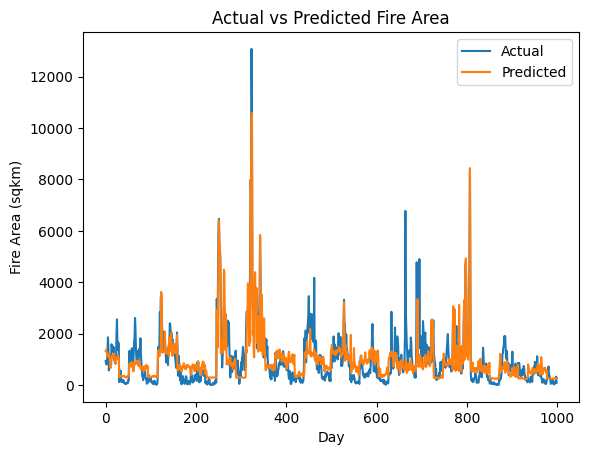

In [49]:
# Graph output vs actual

import matplotlib.pyplot as plt

plt.plot(y, label="Actual")
plt.plot(y_unscaled, label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Fire Area")
plt.xlabel("Day")
plt.ylabel("Fire Area (sqkm)")